In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [2]:
learning_rate = 0.01
training_epochs = 400
n_dim = 10
display_step = training_epochs/n_dim/n_dim
examples_to_show = 10

# Network Parameters
n_hidden_1 = 4
n_hidden_2 = 2 
n_input = 6

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1]), name='encoder_h1'),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]), name='encoder_h2'),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1]), name='decoder_h1'),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input]), name='decoder_h2'),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1]), name='encoder_b1'),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2]), name='encoder_b2'),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1]), name='decoder_b1'),
    'decoder_b2': tf.Variable(tf.random_normal([n_input]), name='decoder_b2'),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

Now to run the actual session

Epoch: 0001 cost= 0.144369856
Epoch: 0201 cost= 0.076329768
Optimization Finished!


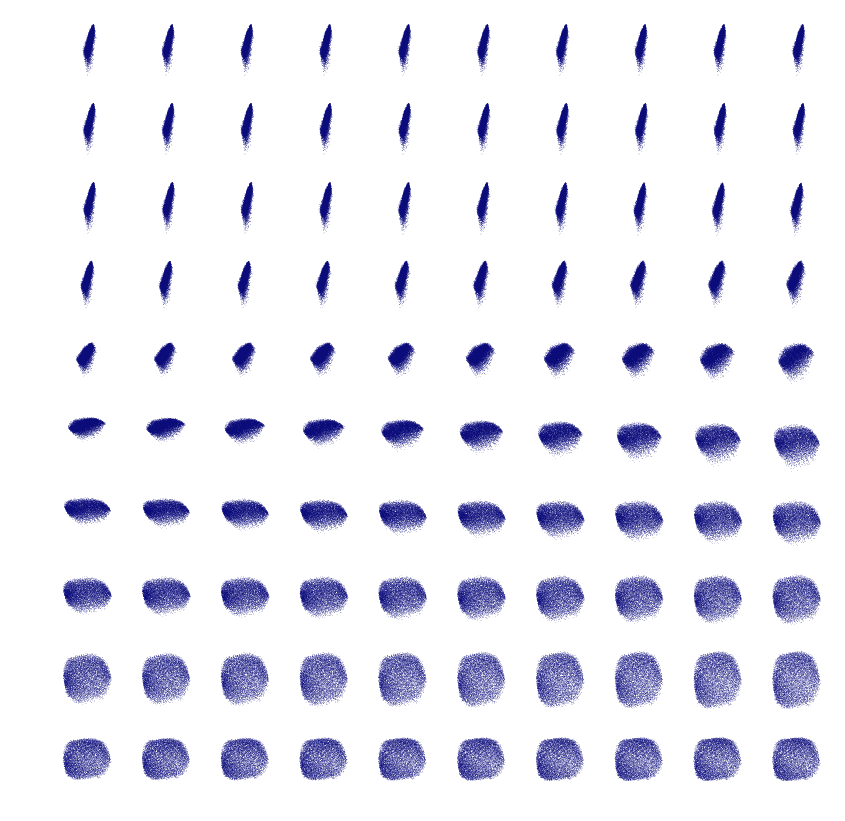

In [3]:
input_data = np.random.uniform(0, 1, (10000, 6))

f, axes = plt.subplots(n_dim, n_dim, sharex='col', sharey='row', figsize = (10, 10))
axes = [item for sublist in axes for item in sublist]

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        batch_xs, batch_ys = input_data, input_data
        _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        if epoch % display_step == 0:
            encoded_data = sess.run(encoder_op, feed_dict={X: input_data})
            dim = int(np.round(epoch/display_step))
            axes[dim].scatter(encoded_data[:, 0], encoded_data[:, 1], 
                              alpha = 0.1, lw = 0, s = 0.5)
            axes[dim].axis('off')
        if epoch % 200 == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
    encoded_data = sess.run(encoder_op, feed_dict={X: input_data})
    pred_data = sess.run(decoder_op, feed_dict={encoder_op: np.random.uniform(0, 1, (1000, 2))})
    tf_vars = sess.run(tf.trainable_variables())
    print("Optimization Finished!")

Here I'll save the weights in a json blob. 

In [4]:
nn_weights = {_.name: tf_vars[i].tolist() for i, _ in enumerate(tf.trainable_variables()) if 'coder' in _.name}
nn_weights_json = json.dumps(nn_weights)

A zoom in of the final featurespace. 

(0, 1)

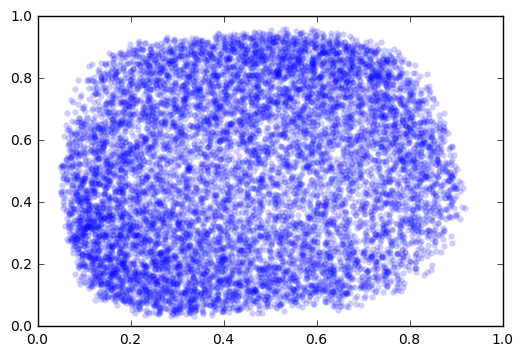

In [5]:
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], alpha = 0.2, lw = 0)
plt.xlim(0, 1)
plt.ylim(0, 1)

A sanity check, assigning a colour to the sum of all slider values to ensure that the allocation isnt totally random. 

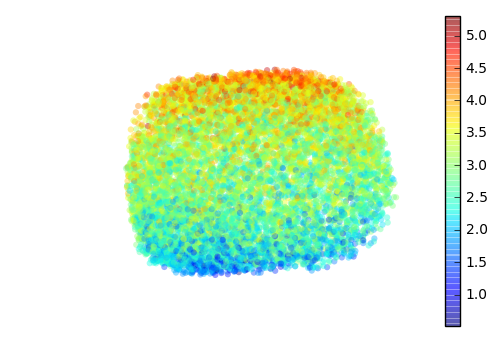

In [6]:
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], 
            c=np.sum(input_data, axis = 1), alpha = 0.4, lw = 0)
plt.axis('off')
plt.colorbar()